In [3]:
'''
Importing necessary libraries for testing
'''

import numpy as np
import pandas as pd
from sklearn import datasets

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn import tree

df = pd.read_csv('./csv/ham_and_phish.csv')
df

,File,Access,Account,Alert,Click,Confidential,Fradulent,Indefinite,Information,Notification,Password,Please,Provide,Request,Update,Upgrade,Verb %,Verify,Result
0,20051114\0.eml,0,3,0,1,0,0,0,4,0,0,0,0,0,4,0,23.66,1,1
1,20051114\1.eml,0,2,0,1,0,0,0,2,0,0,0,0,1,0,0,22.50,0,1
2,20051114\10.eml,0,7,0,1,0,0,1,3,0,0,4,2,0,0,0,21.74,0,1
3,20051114\100.eml,0,2,0,1,0,0,0,3,1,0,4,0,0,4,0,19.35,0,1
4,20051114\101.eml,1,11,4,4,0,2,0,6,1,2,4,1,3,0,0,17.21,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7013,ham995.eml,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26.67,0,0
7014,ham996.eml,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.67,0,0
7015,ham997.eml,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.33,0,0
7016,ham998.eml,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.00,0,0


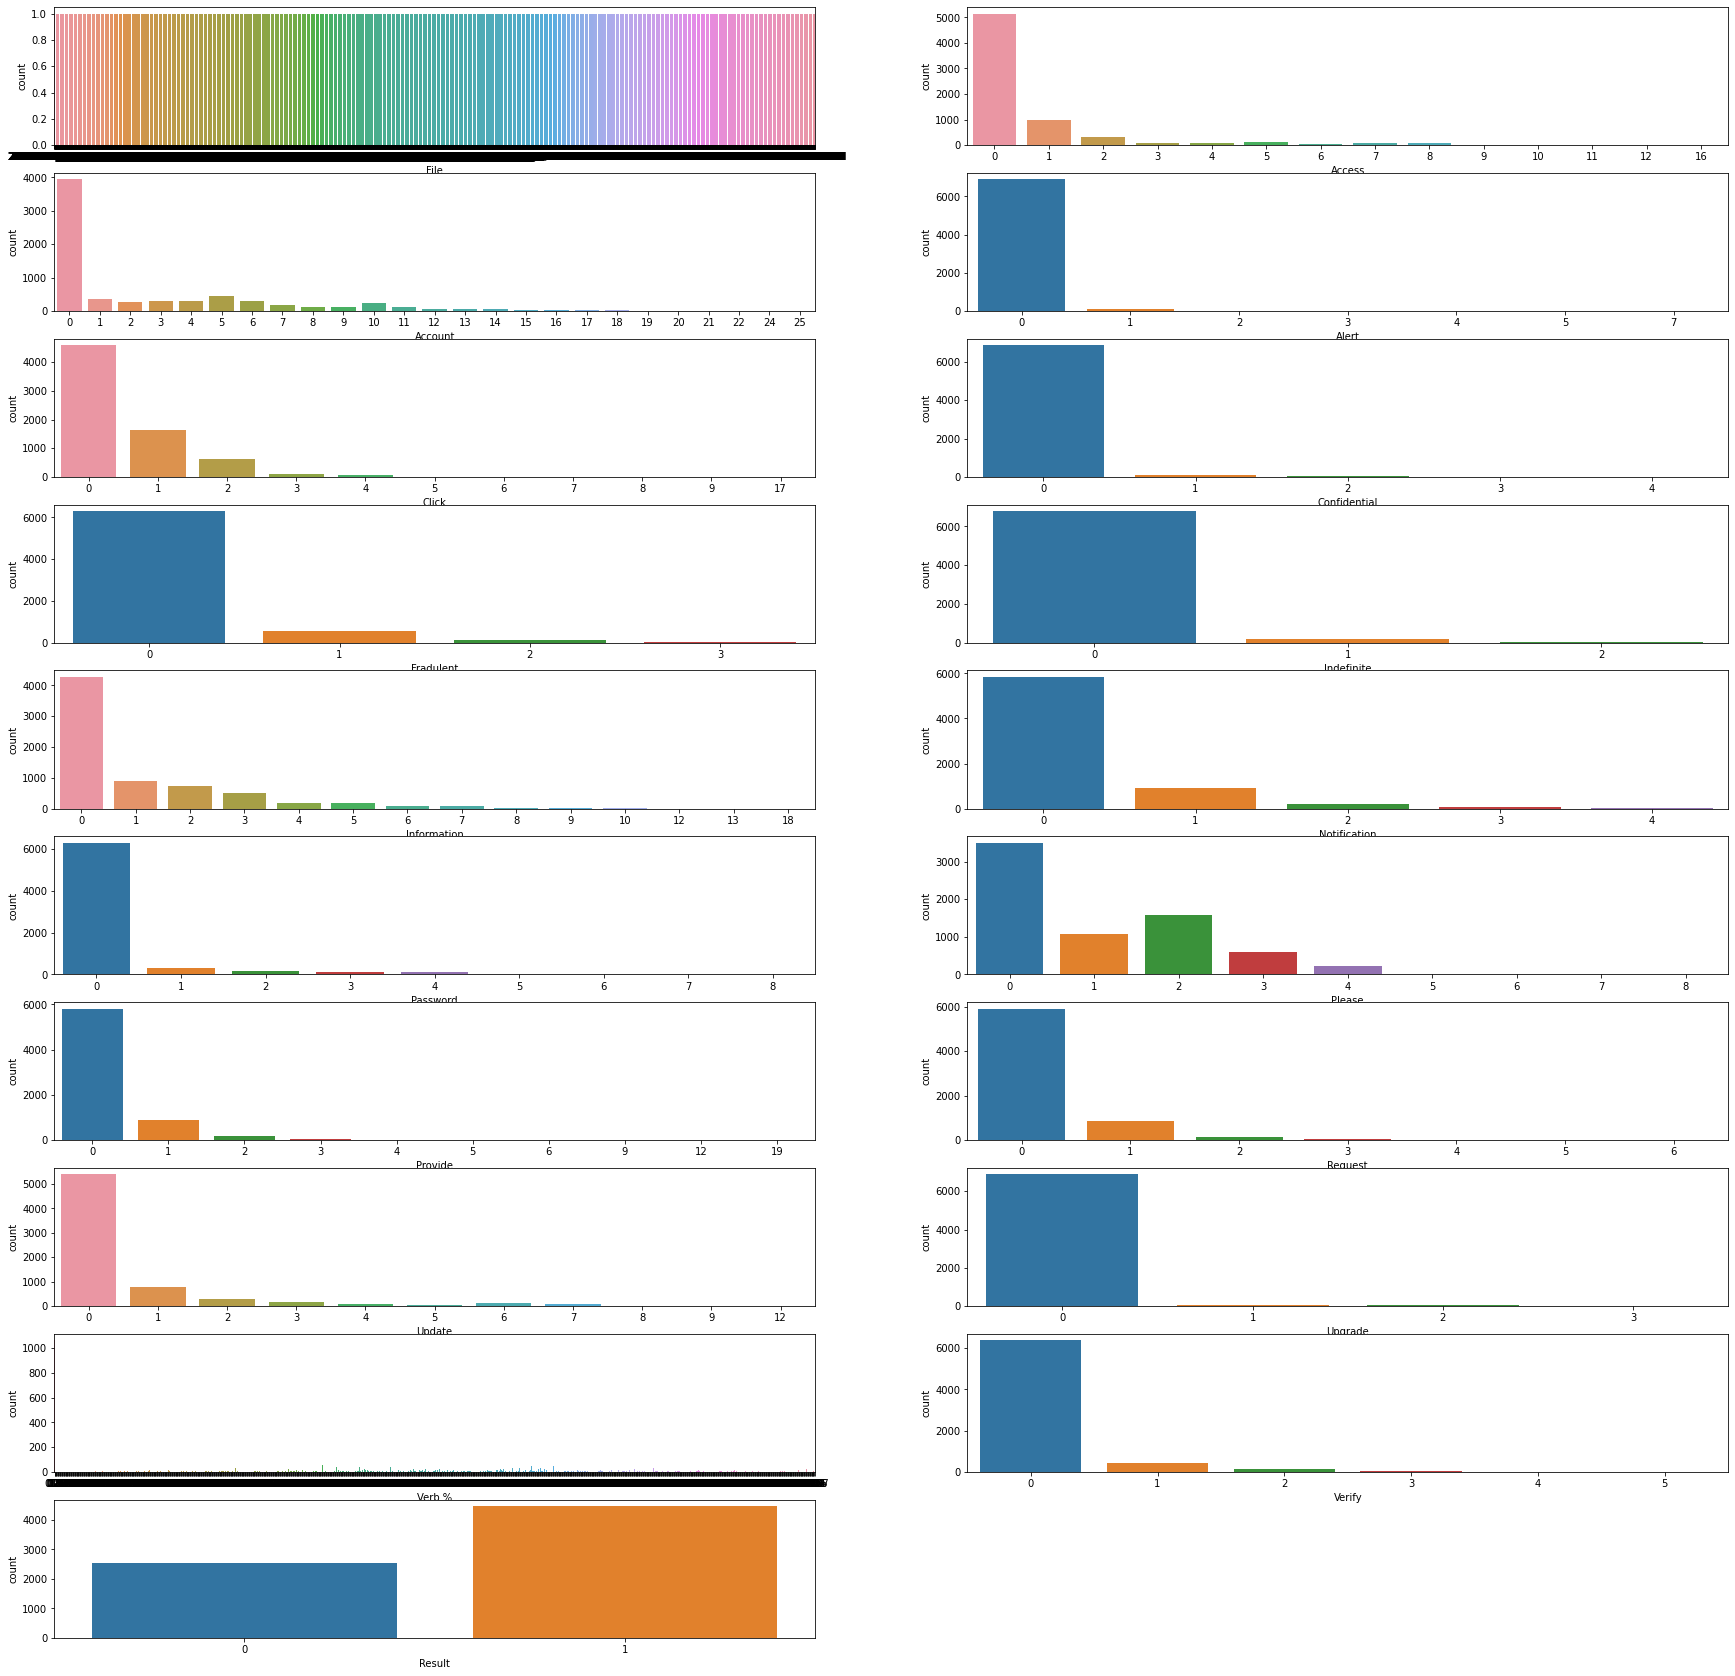

In [4]:
'''
This cell displays the different features and their quantities
'''

i = 1
plt.figure(figsize = (30,30))
for feature in df:
    plt.subplot(10,2,i)
    sns.countplot(x = feature ,  data = df)
    i +=1

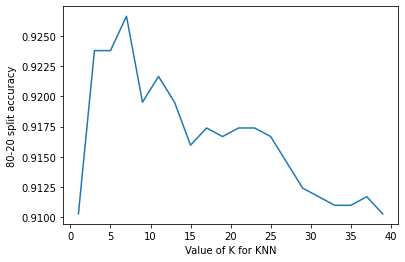

In [5]:
'''
Performing K-Nearest Neighbors Test
'''

data = df.drop(columns=['File','Result'])
answer = df['Result']

X_train, X_test, Y_train, Y_test = train_test_split(data, answer, test_size=0.2)

k_scores = []
k_range=range(1,40,2)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, y_pred)
    k_scores.append(accuracy)
    
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('80-20 split accuracy')
plt.show()



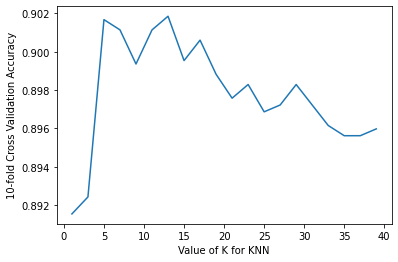

In [6]:
'''
Performing K Nearest Neighbors with Cross Validation
'''

k_scores = []
k_range=range(1,40,2)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    k_scores.append(np.mean(cv_scores))

plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('10-fold Cross Validation Accuracy')
plt.show()

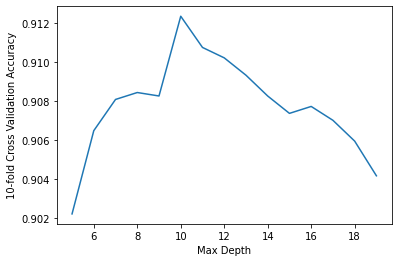

In [7]:
'''
Performing Decision Tree Test
'''

dt_scores = []
types = ["entropy", "gini"]
depth_range = range(5,20,1)

for i in depth_range:
    dtModel = DecisionTreeClassifier(criterion="entropy", max_depth = i, random_state=1)
    dtModel.fit(X_train, Y_train)

    dtPred = dtModel.predict(X_test)

    cv_scores = cross_val_score(dtModel, X_train, Y_train, cv=10, scoring='accuracy')
    dt_scores.append(np.mean(cv_scores))

plt.plot(depth_range,dt_scores)
plt.xlabel('Max Depth')
plt.ylabel('10-fold Cross Validation Accuracy')
plt.show()

Kernel Type:  linear
Accuracy:  0.905982905982906 

Kernel Type:  poly
Accuracy:  0.8746438746438746 

Kernel Type:  rbf
Accuracy:  0.9131054131054132 

Kernel Type:  sigmoid
Accuracy:  0.5797720797720798 



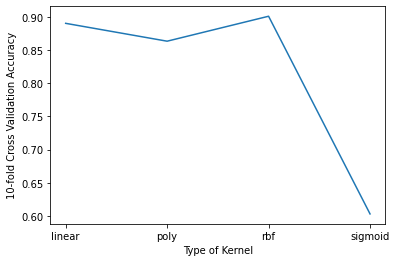

In [8]:
'''
Performing Support Vector Machine Analysis

Graph Displays SVM scores with cross validation
'''
kernels = ['linear','poly', 'rbf', 'sigmoid']

svm_scores = []
for i in kernels:
    svmModel = svm.SVC(kernel=i)

    svmModel.fit(X_train,Y_train)

    yPred = svmModel.predict(X_test)

    print("Kernel Type: ", i)
    print("Accuracy: ",metrics.accuracy_score(Y_test, yPred), "\n")

    cv_scores = cross_val_score(svmModel, X_train, Y_train, cv=10, scoring='accuracy')
    svm_scores.append(np.mean(cv_scores))

plt.plot(kernels,svm_scores)
plt.xlabel('Type of Kernel')
plt.ylabel('10-fold Cross Validation Accuracy')
plt.show()


In [7]:
'''
Performing Logistic Regression Analysis
'''

model = LogisticRegression()

model.fit(X_train, Y_train)

pred = model.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(Y_test, pred))

Accuracy:  0.8831908831908832
